In [1]:
from collections import defaultdict
import json

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import pandas as pd
df=pd.read_csv("data/dataset.csv")
print(len(df.columns))
print(len(df.index))

10
10


In [3]:
print(df.columns)

Index(['year', 'employment_ratio', 'household_expenditure', 'export_value_index', 'energy_use', 'net_portfolio_investment', 'import_value_index', 'population', 'GDP', 'SP500'], dtype='object')


In [4]:
df.head()

,year,employment_ratio,household_expenditure,export_value_index,energy_use,net_portfolio_investment,import_value_index,population,GDP,SP500
0,2006,63.119999,9.980000e+12,131.211585,7697.652535,-6.330000e+11,152.312952,298379912,1.480000e+13,1318.309153
1,2007,62.990002,1.020000e+13,146.843915,7758.165986,-7.760000e+11,160.438577,301231207,1.510000e+13,1478.095825
2,2008,62.180000,1.020000e+13,164.651792,7488.081921,-8.080000e+11,172.277225,304093966,1.500000e+13,1215.221659
3,2009,59.320000,1.000000e+13,135.058024,7056.783653,1.853000e+10,127.475240,306771529,1.460000e+13,948.517492
4,2010,58.470001,1.020000e+13,163.507554,7160.939243,-6.210000e+11,156.371309,309348193,1.500000e+13,1130.681661


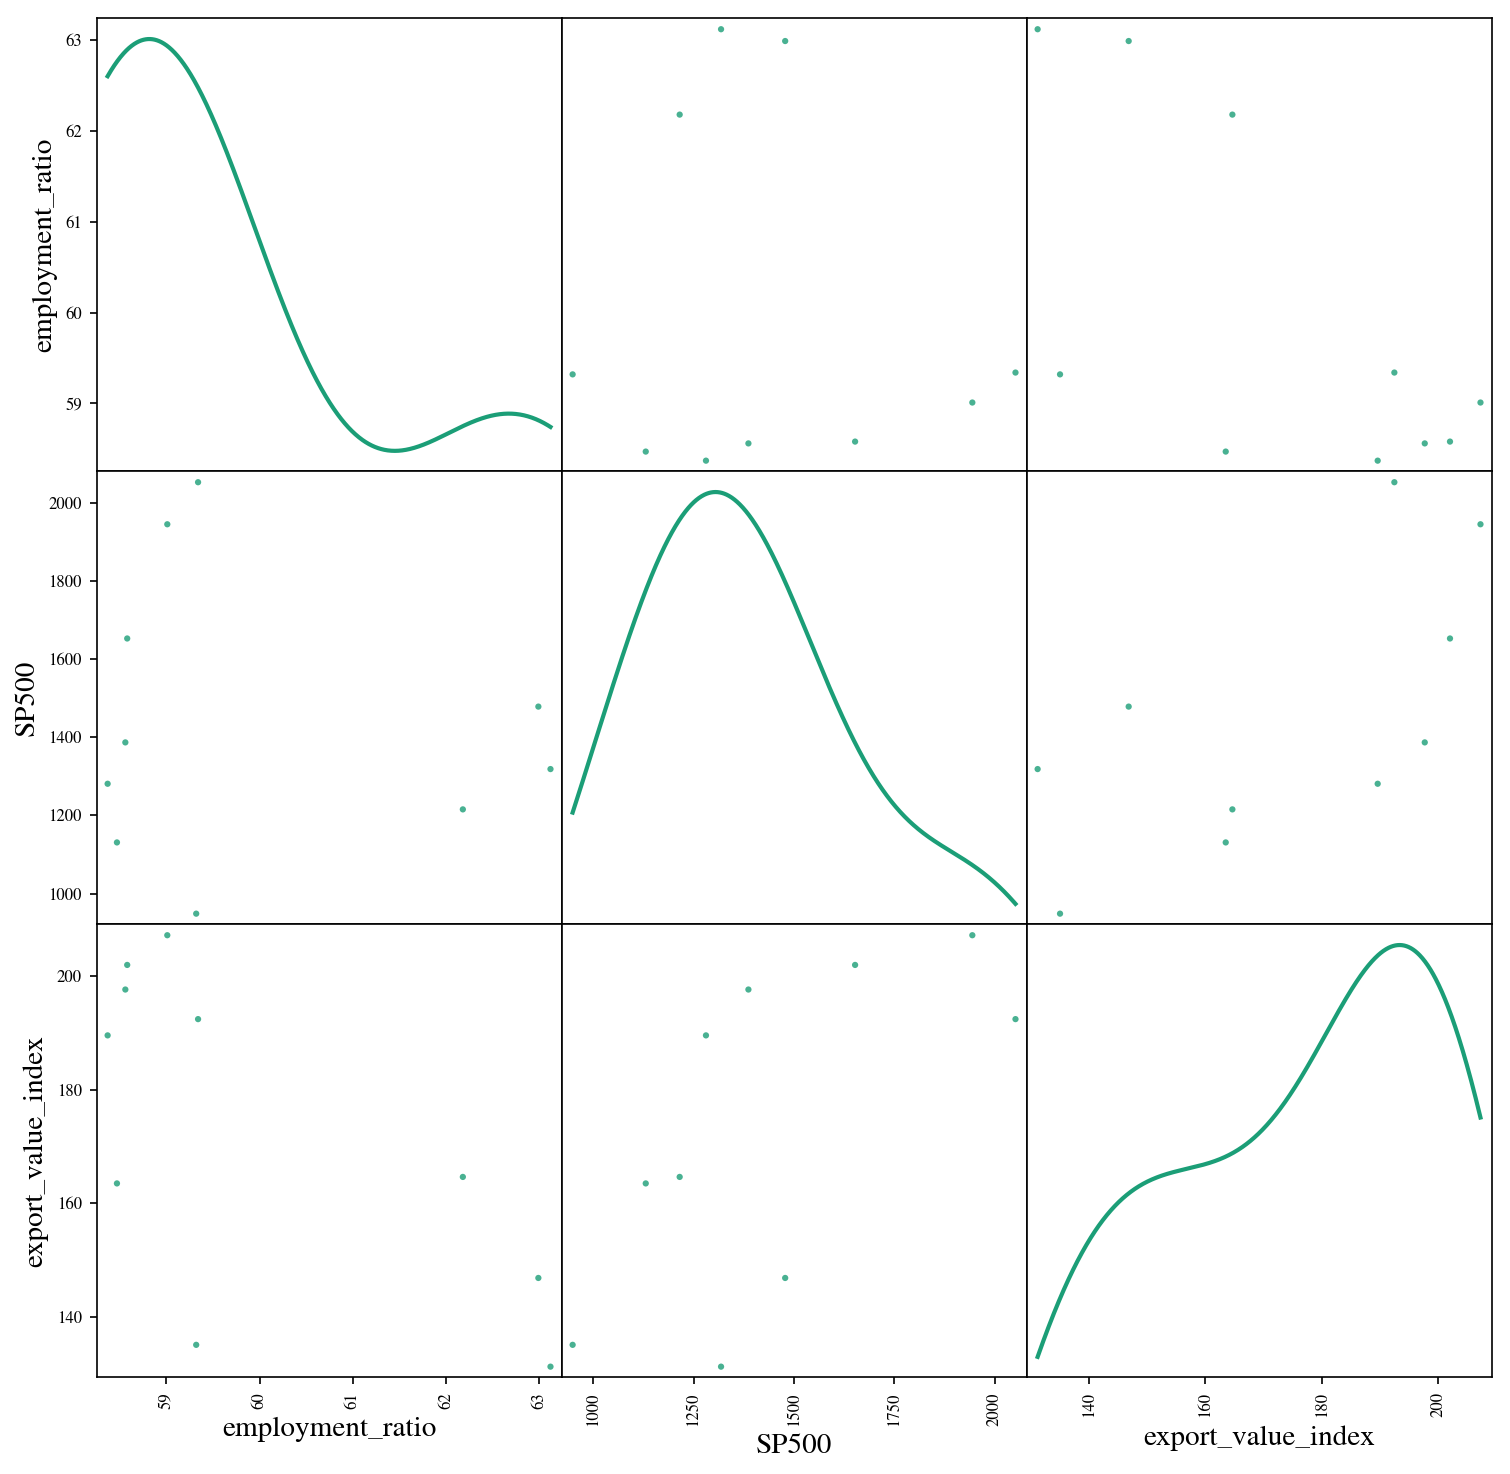

In [5]:
smaller_frame=df[['employment_ratio', 'SP500', 'export_value_index']]
from pandas.plotting import scatter_matrix
axeslist=scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)
plt.show()

In [6]:
smaller_frame.corr()

,employment_ratio,SP500,export_value_index
employment_ratio,1.000000,-0.132357,-0.672212
SP500,-0.132357,1.000000,0.655439
export_value_index,-0.672212,0.655439,1.000000


In [7]:
from sklearn.linear_model import LinearRegression
X_HD=smaller_frame[['export_value_index', 'SP500']].values
X_HDn=(X_HD - X_HD.mean(axis=0))/X_HD.std(axis=0)
evi_std_vec=X_HDn[:,0]
evi_std=evi_std_vec.reshape(-1,1)
SP500_std_vec=X_HDn[:,1]
SP500_std=SP500_std_vec.reshape(-1,1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(evi_std, SP500_std_vec)

In [9]:
clf1 = LinearRegression()
clf1.fit(X_train, y_train)
predicted_train = clf1.predict(X_train)
predicted_test = clf1.predict(X_test)
trains=X_train.reshape(1,-1).flatten()
tests=X_test.reshape(1,-1).flatten()
print (clf1.coef_, clf1.intercept_)

[ 0.18467258] -0.252215655136


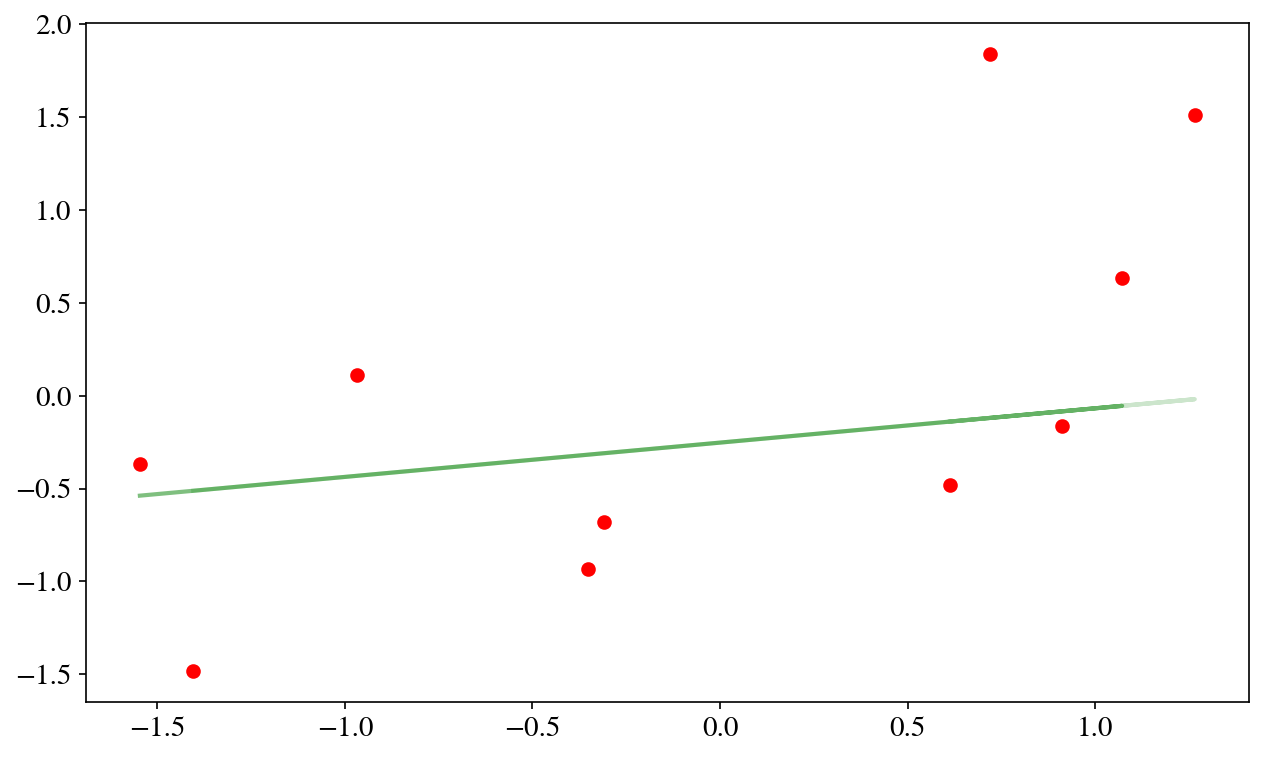

In [10]:
plt.scatter(evi_std_vec, SP500_std_vec,c='r')
plt.plot(trains, predicted_train, c='g', alpha=0.5)
plt.plot(tests, predicted_test, c='g', alpha=0.2)
plt.show()

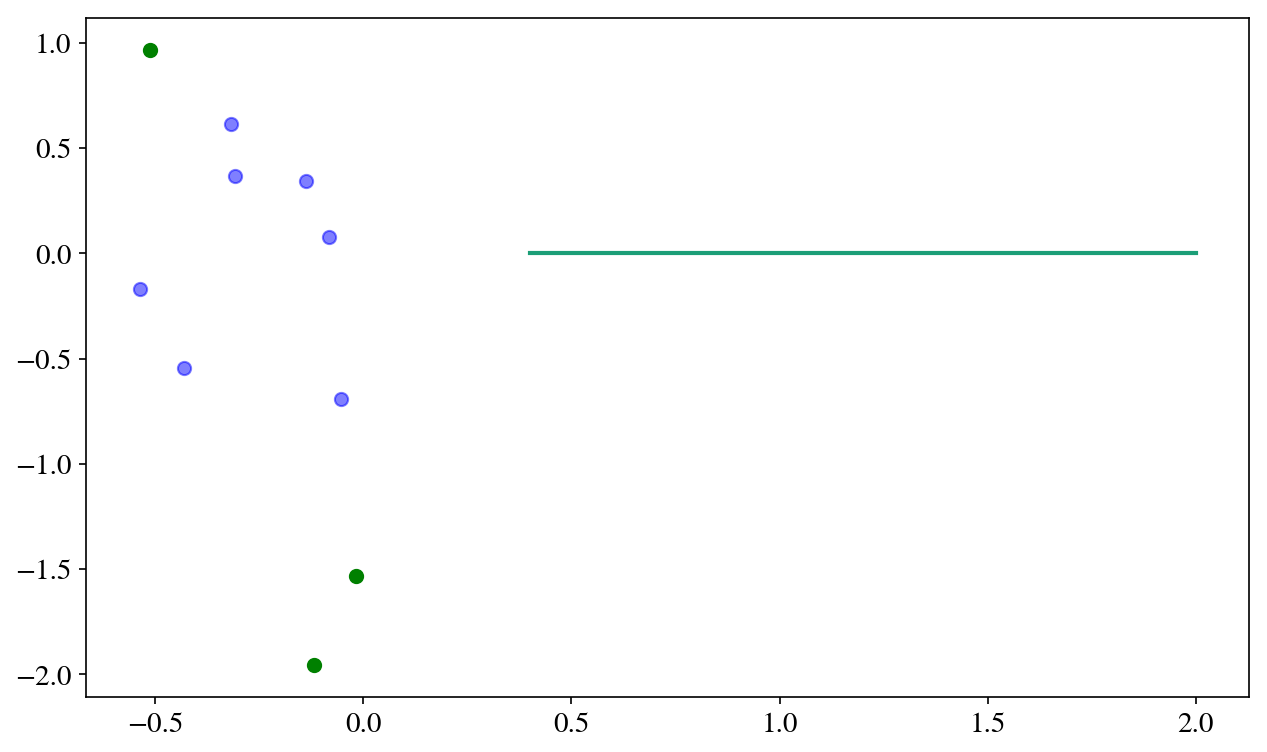

In [11]:
plt.scatter(predicted_test, predicted_test- y_test, c='g', s=40)
plt.scatter(predicted_train, predicted_train- y_train, c='b', s=40, alpha=0.5)
plt.plot([0.4,2],[0,0])
plt.show()

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X_HDn)
print (pca.explained_variance_ratio_)

[ 0.82771944  0.17228056]


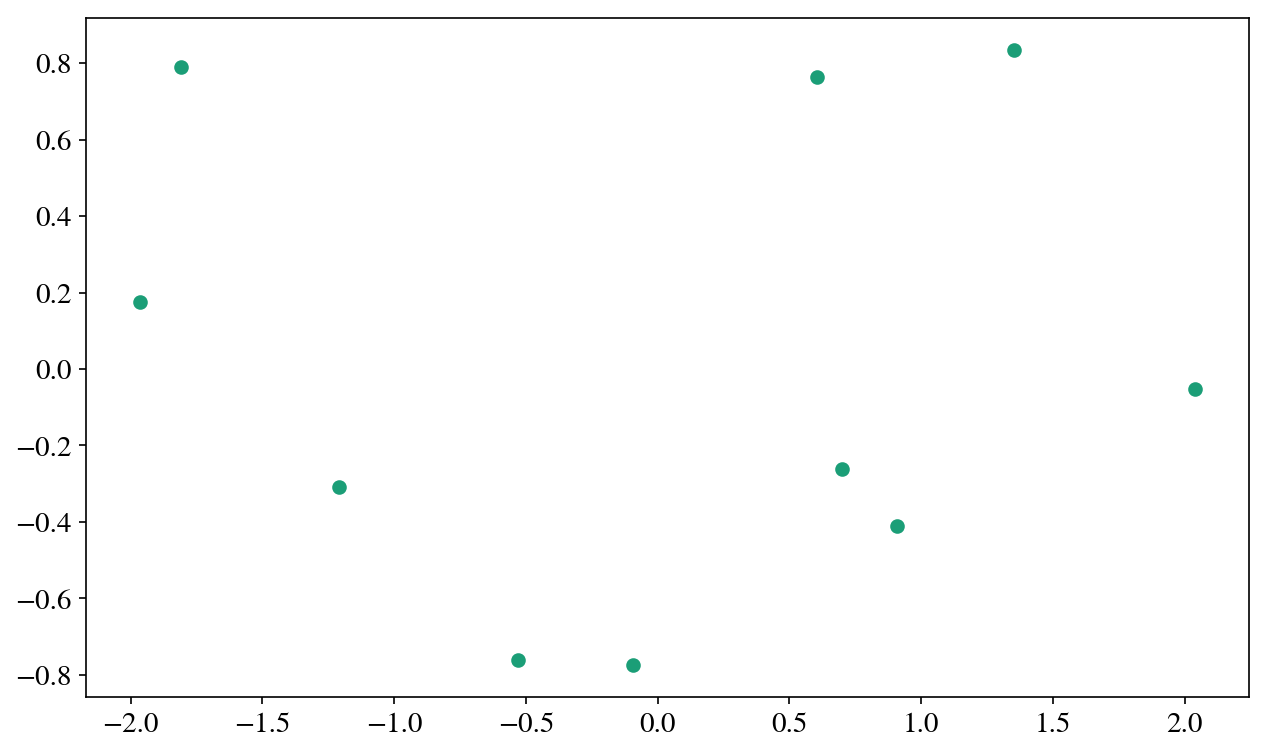

In [13]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [14]:
pca1 = PCA(n_components=1) # only keep one dimension!
X_E = pca1.fit_transform(X_HDn)
X_reconstructed = pca1.inverse_transform(X_E)

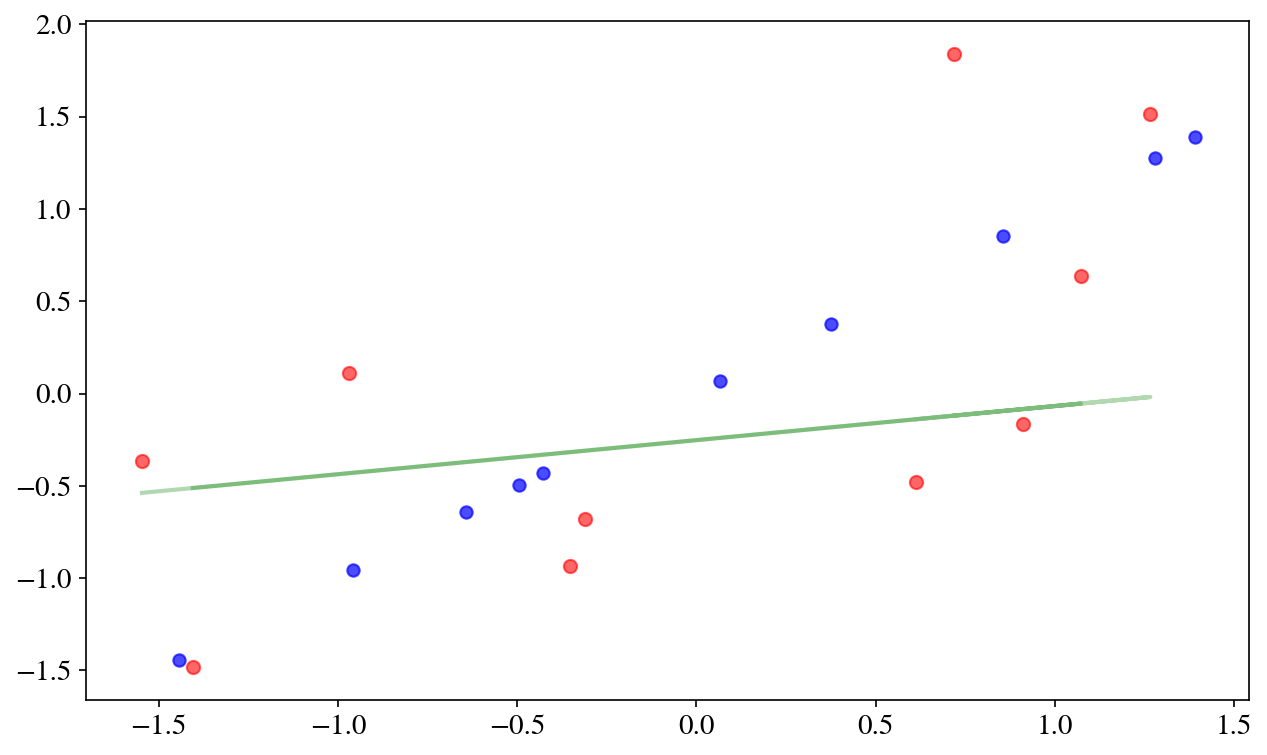

In [15]:
plt.scatter(X_reconstructed[:,0], X_reconstructed[:,1],c='b', s=35, alpha=0.7)
plt.scatter(evi_std_vec, SP500_std_vec, s=40, c='r', alpha=0.6)
plt.plot(trains, predicted_train, c='g', alpha=0.3)
plt.plot(tests, predicted_test, c='g', alpha=0.3)
plt.show()

In [16]:
data=np.array([[ 66.,   0.],
       [ 70.,   1.],
       [ 69.,   0.],
       [ 68.,   0.],
       [ 67.,   0.],
       [ 72.,   0.],
       [ 73.,   0.],
       [ 70.,   0.],
       [ 57.,   1.],
       [ 63.,   1.],
       [ 70.,   1.],
       [ 78.,   0.],
       [ 67.,   0.],
       [ 53.,   1.],
       [ 67.,   0.],
       [ 75.,   0.],
       [ 70.,   0.],
       [ 81.,   0.],
       [ 76.,   0.],
       [ 79.,   0.],
       [ 75.,   1.],
       [ 76.,   0.],
       [ 58.,   1.]])

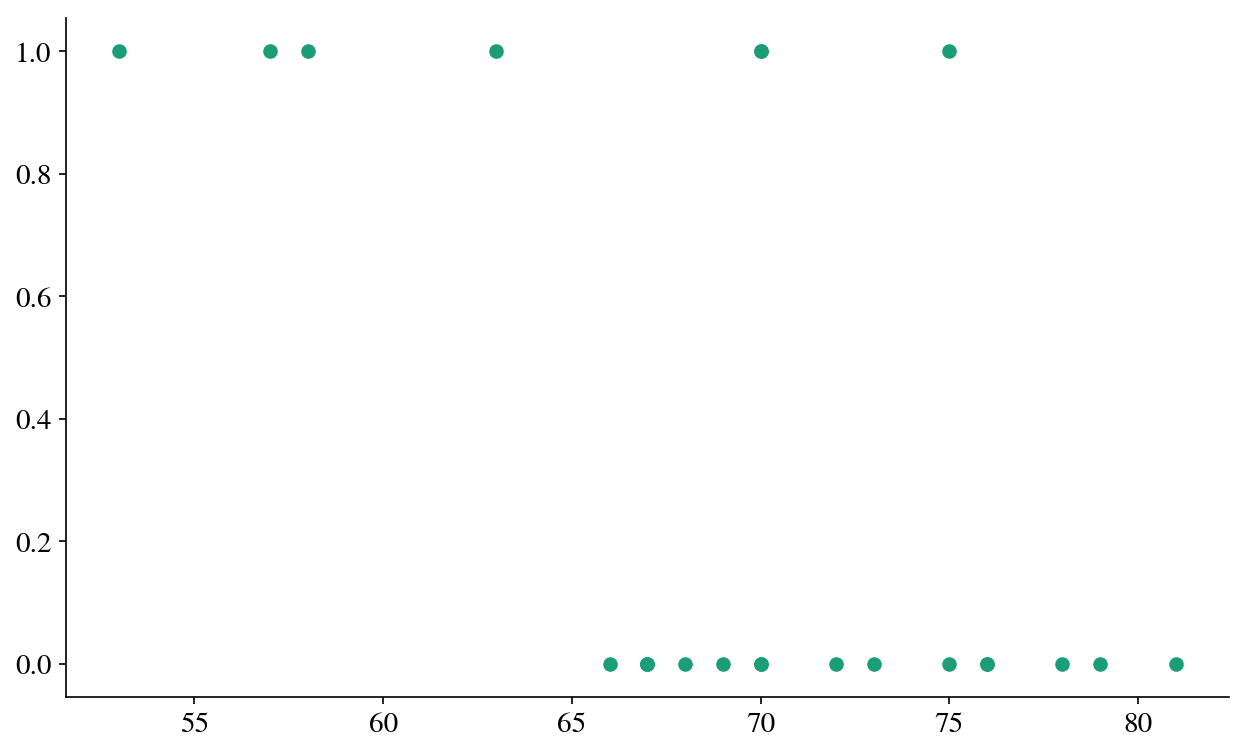

In [17]:
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
axes.grid(False)
remove_border(axes)
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
reg=1000.
clf4 = LogisticRegression(C=reg)
clf4.fit(temps.reshape(-1,1), pfail)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [19]:
tempsnew=np.linspace(20., 90., 15)
probs = clf4.predict_proba(tempsnew.reshape(-1,1))[:, 1]
predicts = clf4.predict(tempsnew.reshape(-1,1))

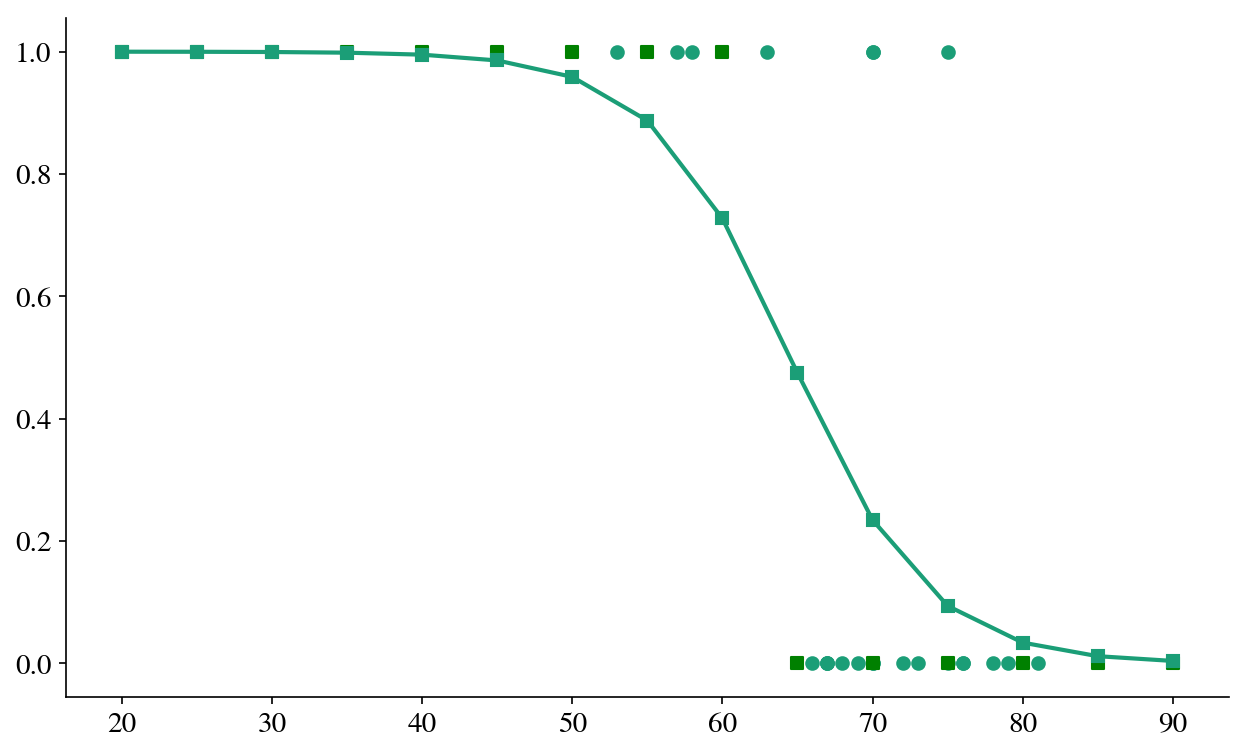

In [20]:
plt.scatter(temps, pfail)
axes=plt.gca()
axes.grid(False)
remove_border(axes)
plt.plot(tempsnew, probs, marker='s')
plt.scatter(tempsnew, predicts, marker='s', color="green")
plt.show()

In [21]:
pd.crosstab(pfail, clf4.predict(temps.reshape(-1,1)), rownames=["Actual"], colnames=["Predicted"])

Predicted,0.0,1.0
Actual,,
0.0,16,0
1.0,3,4


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [23]:
import random
import copy
def scatter_by(df, scatterx, scattery, by=None, figure=None, axes=None, colorscale=dark2_cmap, labeler={}, mfunc=None, setupfunc=None, mms=8):
    cs=copy.deepcopy(colorscale.mpl_colors)
    if not figure:
        figure=plt.figure(figsize=(8,8))
    if not axes:
        axes=figure.gca()
    x=df[scatterx]
    y=df[scattery]
    if not by:
        col=random.choice(cs)
        axes.scatter(x, y, cmap=colorscale, c=col)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            mfunc(axeslist,x,y,color=col, mms=mms)
    else:
        cs=list(np.linspace(0,1,len(df.groupby(by))))
        xlimsd={}
        ylimsd={}
        xs={}
        ys={}
        cold={}
        for k,g in df.groupby(by):
            col=cs.pop()
            x=g[scatterx]
            y=g[scattery]
            xs[k]=x
            ys[k]=y
            c=colorscale.mpl_colormap(col)
            cold[k]=c
            axes.scatter(x, y, c=c, label=labeler.get(k,k), s=40, alpha=0.3);
            xlimsd[k]=axes.get_xlim()
            ylimsd[k]=axes.get_ylim()
        xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
        ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
        axes.set_xlim(xlims)
        axes.set_ylim(ylims)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            for k in xs.keys():
                mfunc(axeslist,xs[k],ys[k],color=cold[k], mms=mms);
    axes.set_xlabel(scatterx);
    axes.set_ylabel(scattery);
    
    return axes

def make_rug(axeslist, x, y, color='b', mms=8):
    axes=axeslist[0]
    zerosx1=np.zeros(len(x))
    zerosx2=np.zeros(len(x))
    xlims=axes.get_xlim()
    ylims=axes.get_ylim()
    zerosx1.fill(ylims[1])
    zerosx2.fill(xlims[1])
    axes.plot(x, zerosx1, marker='|', color=color, ms=mms)
    axes.plot(zerosx2, y, marker='_', color=color, ms=mms)
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    return axes

In [24]:
import pandas as pd
df=pd.read_csv("data/dataset.csv")
print(len(df.columns))
print(len(df.index))

10
10


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


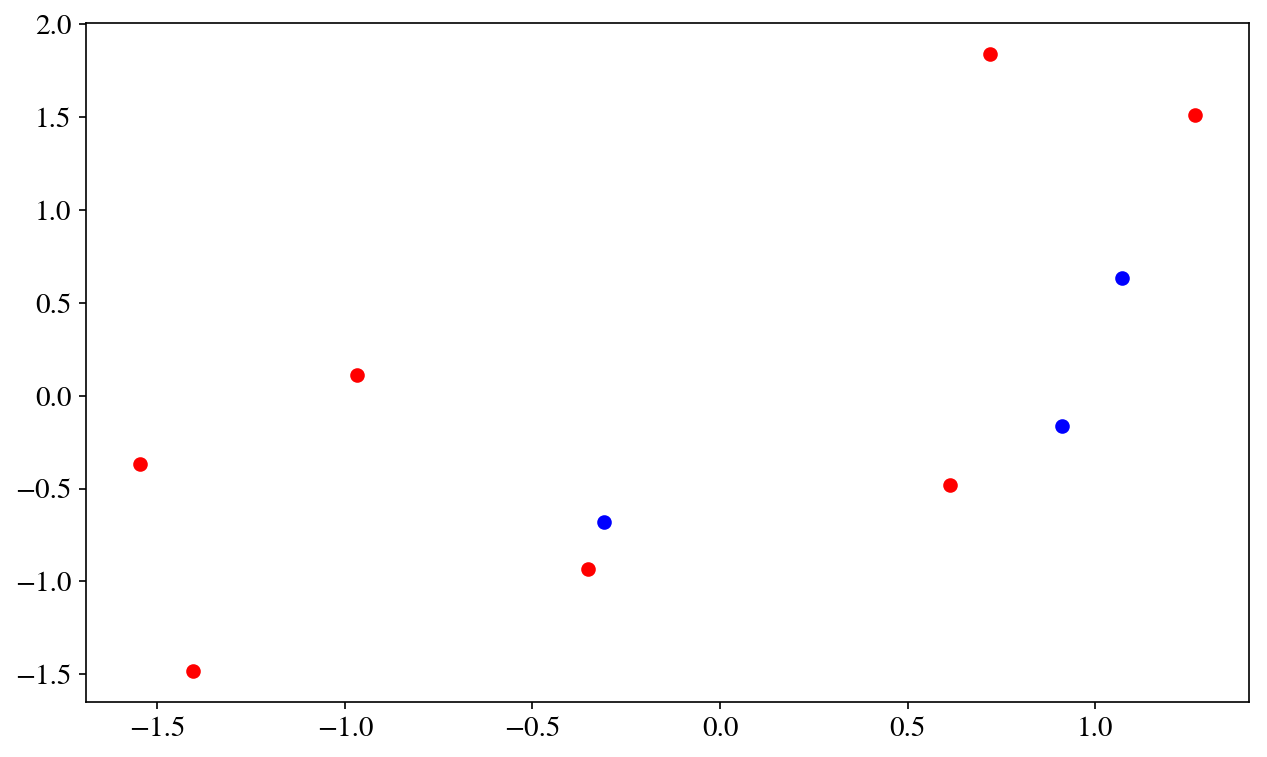

In [25]:
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(evi_std, SP500_std_vec)
plt.scatter(xtrain, ytrain, color='red')
plt.scatter(xtest, ytest, color='blue')
plt.show()

In [26]:
df['randNumCol'] = np.random.randint(1, 4, df.shape[0])
print(df.columns)

Index(['year', 'employment_ratio', 'household_expenditure', 'export_value_index', 'energy_use', 'net_portfolio_investment', 'import_value_index', 'population', 'GDP', 'SP500', 'randNumCol'], dtype='object')


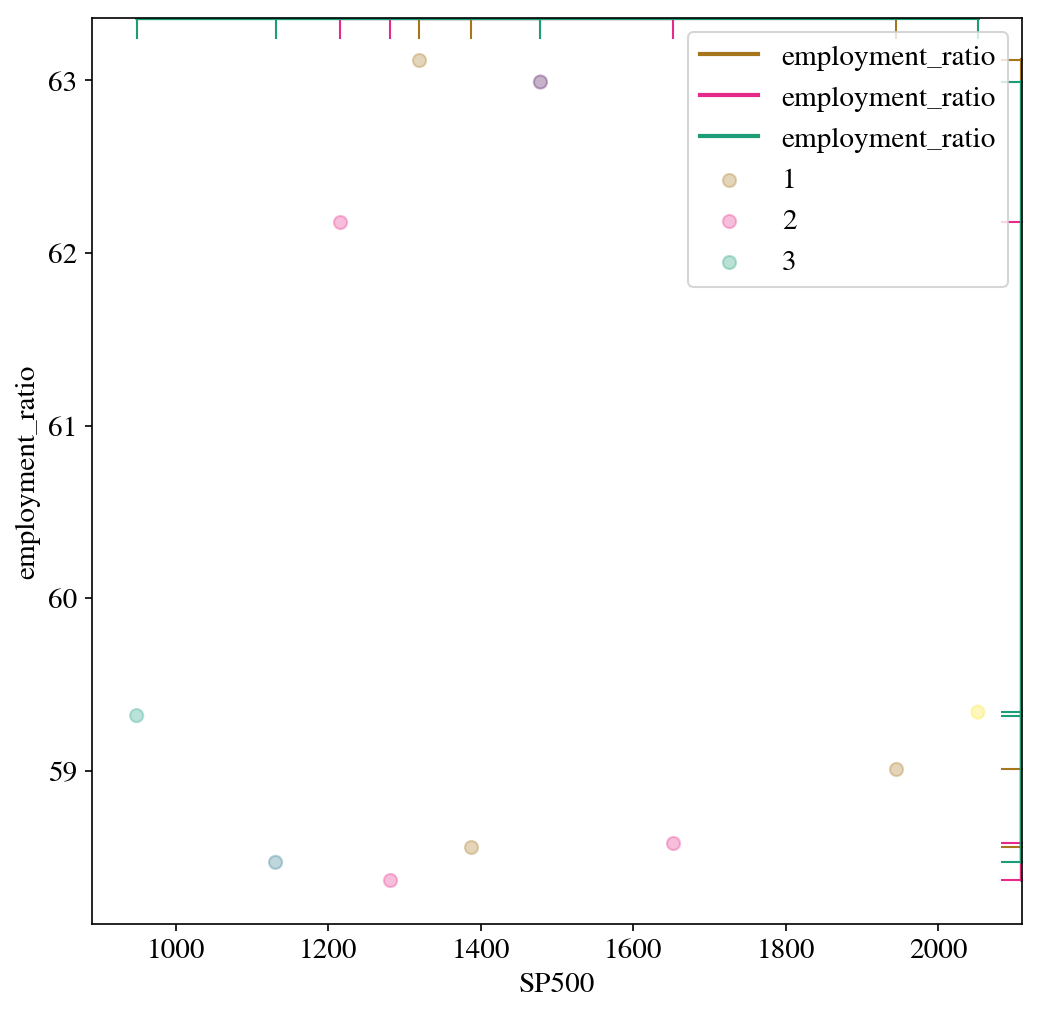

In [27]:
akeys=[1,2,3]
avals=['1','2','3']
amap={e[0]:e[1] for e in zip(akeys,avals)}
ax=scatter_by(df, 'SP500', 'employment_ratio', by='randNumCol', labeler=amap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right');
plt.show()

In [28]:
from matplotlib.colors import ListedColormap
#cm_bright = ListedColormap(['#FF0000', '#000000','#0000FF'])
#cm = plt.cm.RdBu
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def points_plot(X, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    plt.figure()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cdiscrete, s=50, alpha=0.2,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    print ("SCORE"), clf.score(Xte, yte)
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cdiscrete, alpha=0.5, marker="s", s=35)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return ax

In [29]:
from sklearn.neighbors import KNeighborsClassifier
subdf=df[['employment_ratio','SP500']]
subdfstd=(subdf - subdf.mean())/subdf.std()
X=subdfstd.values
y=df['randNumCol'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.6)
Xtr=np.concatenate((Xtrain, Xtest))

SCORE


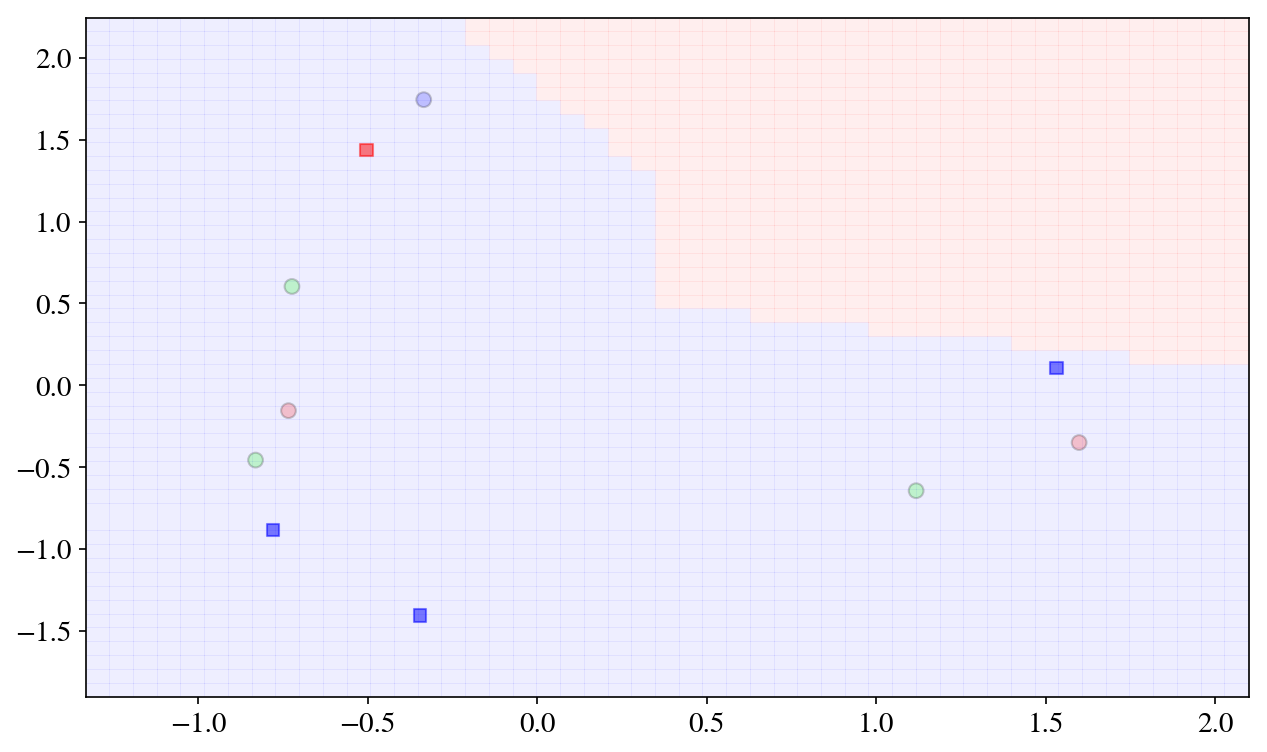

In [30]:
clf = KNeighborsClassifier(5).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)
plt.show()

SCORE


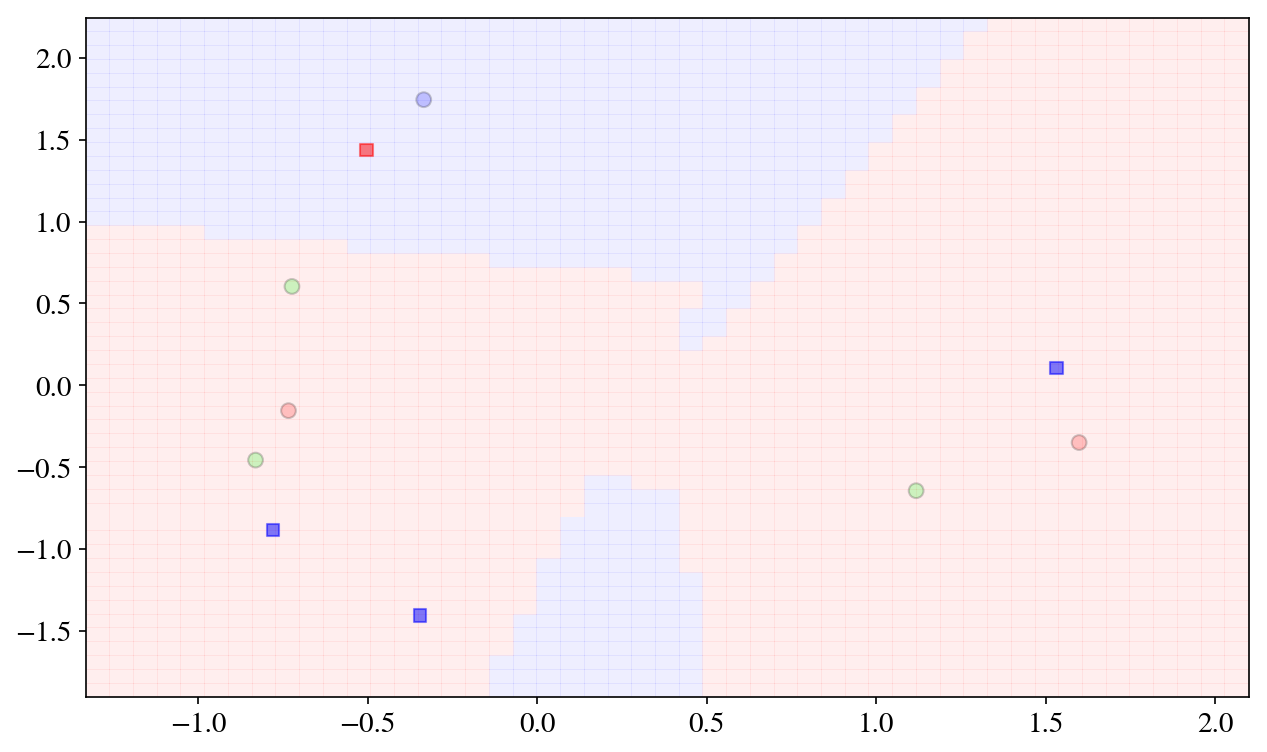

In [31]:
clf = KNeighborsClassifier(2).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)
plt.show()

SCORE


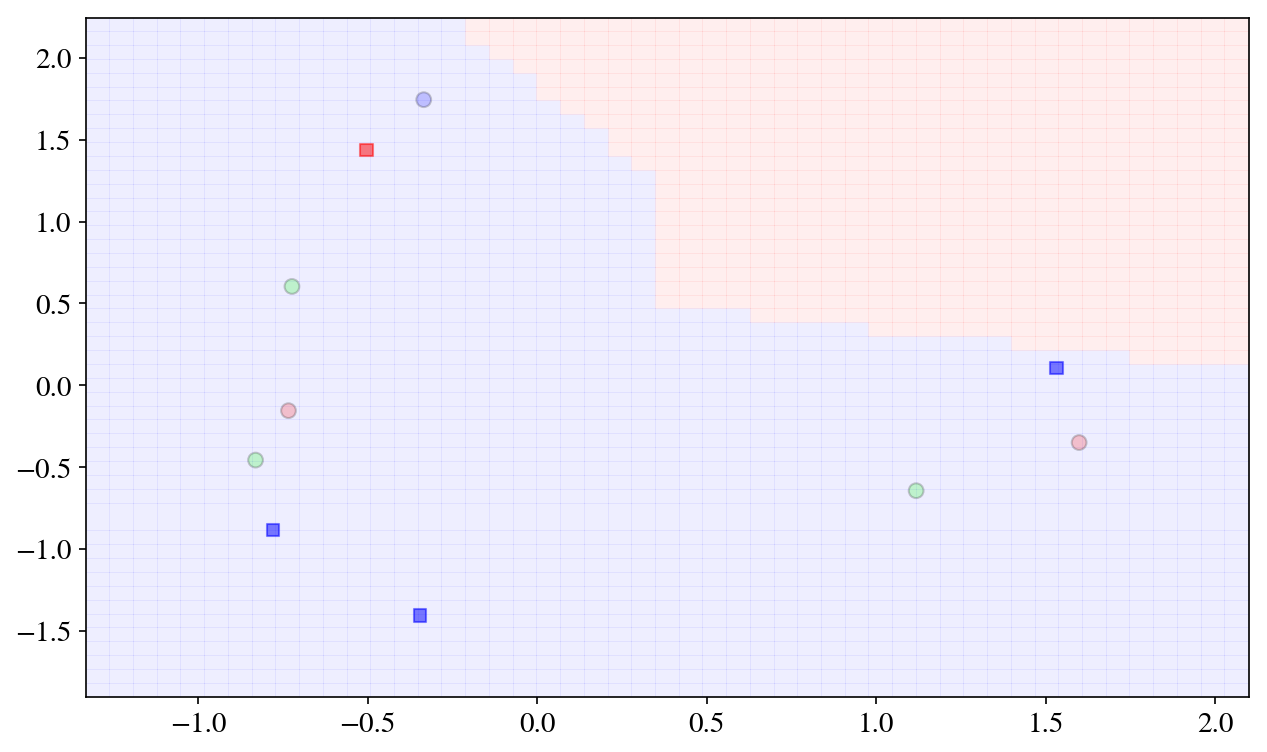

In [32]:
clf = KNeighborsClassifier(5).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)
plt.show()

In [33]:
Xcv,Xte,ycv,yte=train_test_split(Xtest, ytest)
print (ytrain.shape, ycv.shape, yte.shape)
trscores=[]
cvscores=[]
ns=np.arange(1,80,1)
ones=np.ones(len(ns))
for n in ns:
    clf = KNeighborsClassifier(n).fit(Xtrain, ytrain)
    trscores.append(clf.score(Xtrain, ytrain))
    cvscores.append(clf.score(Xcv, ycv))
plt.plot(ns, ones-trscores, label="training")
plt.plot(ns, ones-cvscores, label="cv")
plt.legend(loc='upper left');
print (clf.score(Xte, yte))

(6,) (3,) (1,)


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 6, n_neighbors = 7

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
Xtr=np.concatenate((Xtrain, Xtest))

In [42]:

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
parameters = {"n_neighbors": np.arange(1,80,1)}
clf = KNeighborsClassifier()
gs = GridSearchCV(clf, param_grid=parameters, cv=10)
gs.fit(Xtrain, ytrain)
#print gs.grid_scores_
print (gs.best_params_, gs.best_score_)
y_true, y_pred = ytest, gs.predict(Xtest)
print(classification_report(y_true, y_pred))

ValueError: Cannot have number of folds n_folds=10 greater than the number of samples: 8.

In [49]:
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, gs)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'